<a href="https://colab.research.google.com/github/RyanPrado/yolov5-TL-DIO/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ [YOLOv5](https://github.com/ultralytics/yolov5) - Transfer Learning

Este projeto estamos realizando o transfer-learning com a rede YOLOv5, nosso objetivo é adicionar a detecção e classificação do rosto do [Jim Carrey](https://pt.wikipedia.org/wiki/Jim_Carrey), abaixo listarem as etapas necessárias para esta realização:

*   Download do YoloV5;
*   Download do Dataset do Github da YOLOv5;
*   Realizar o novo treinamento com o DataSet baixado;

#❓ Como preparar o Dataset?

Para criar o dataset que você verá no download do github, foi feito uma série de processos, estes são nomeados pré-processamento, está etapas foram:

*   Baixar diversas imagens do Jim Carrey da internet;
*   Utilizar tecnicas de data argumentation para dinamificar as imagens sem a necessidade de baixar varias;
*   Utilizado a ferramenta [**LabelMe**](https://github.com/wkentaro/labelme) para fazer o mapeamento e anotações;
*   Após utilizado [**LabelMe2Yolo**](https://pypi.org/project/labelme2yolo/) para converter os arquivos `.json` para `.txt`;



#### 1º - Clonando o Repositório do YOLOv5

Aqui executamos o clone diretamente do repositorio da YOLO, também executados um clone do meu repositorio que possui o dataset

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/RyanPrado/yolov5-TL-DIO
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 17265 (delta 90), reused 51 (delta 33), pack-reused 17067 (from 3)
Receiving objects: 100% (17265/17265), 16.10 MiB | 8.47 MiB/s, done.
Resolving deltas: 100% (11794/11794), done.
Cloning into 'yolov5-TL-DIO'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (353/353), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 353 (delta 0), reused 350 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (353/353), 13.12 MiB | 15.15 MiB/s, done.
/content/yolov5


#### 2º - Instalando as Dependências
Certifica que as dependências estão instaladas:

In [ ]:
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


#### 3º - Preparando o ambiente
Abaixo organizamos os diretórios para facilitar a manipulação baseado na estrutura da própria rede YOLOv5

In [ ]:
!mkdir -p "../datasets"
!cp -R "../yolov5-TL-DIO/dataset/." "../datasets/JimCarrey/"
!mv -f "../datasets/JimCarrey/jimcarrey.yaml" "data/jimcarrey.yaml"
!rm -rf "../yolov5-TL-DIO"

#### 4º - Iniciando o treinamento
Apontamos agora que queremos treinar a rede YOLOv5 através do pesos `yolov5s`, o treinamento terá 50 gerações

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 50 --data jimcarrey.yaml --weights yolov5s.pt --cache

2025-01-15 21:36:35.941085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-15 21:36:35.957613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-15 21:36:35.963483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=jimcarrey.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, o

#### 5º - Validando o treino

Agora pegamos nossa base de dados de validação executamos utilizando os pesos gerados pós o treinamento

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data jimcarrey.yaml --img 640 --half

val: data=/content/yolov5/data/jimcarrey.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/datasets/JimCarrey/labels/val.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.24s/it]
                   all         34         34      0.998          1      0.995       0.77
Speed: 0.3ms pre-process, 13.5ms inference, 58.0ms NMS per image at shape (32, 3, 640, 640)
Results saved

# 🌟 Resultado

Abaixo podemos ver o resultado da detecção através de uma das imagens que estão registradas para validação

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/JimCarrey/images/val/aug_0_18.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/datasets/JimCarrey/images/val/aug_0_18.jpg: 640x480 1 JimCarrey, 27.2ms
Speed: 0.5ms pre-process, 27.2ms inference, 567.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


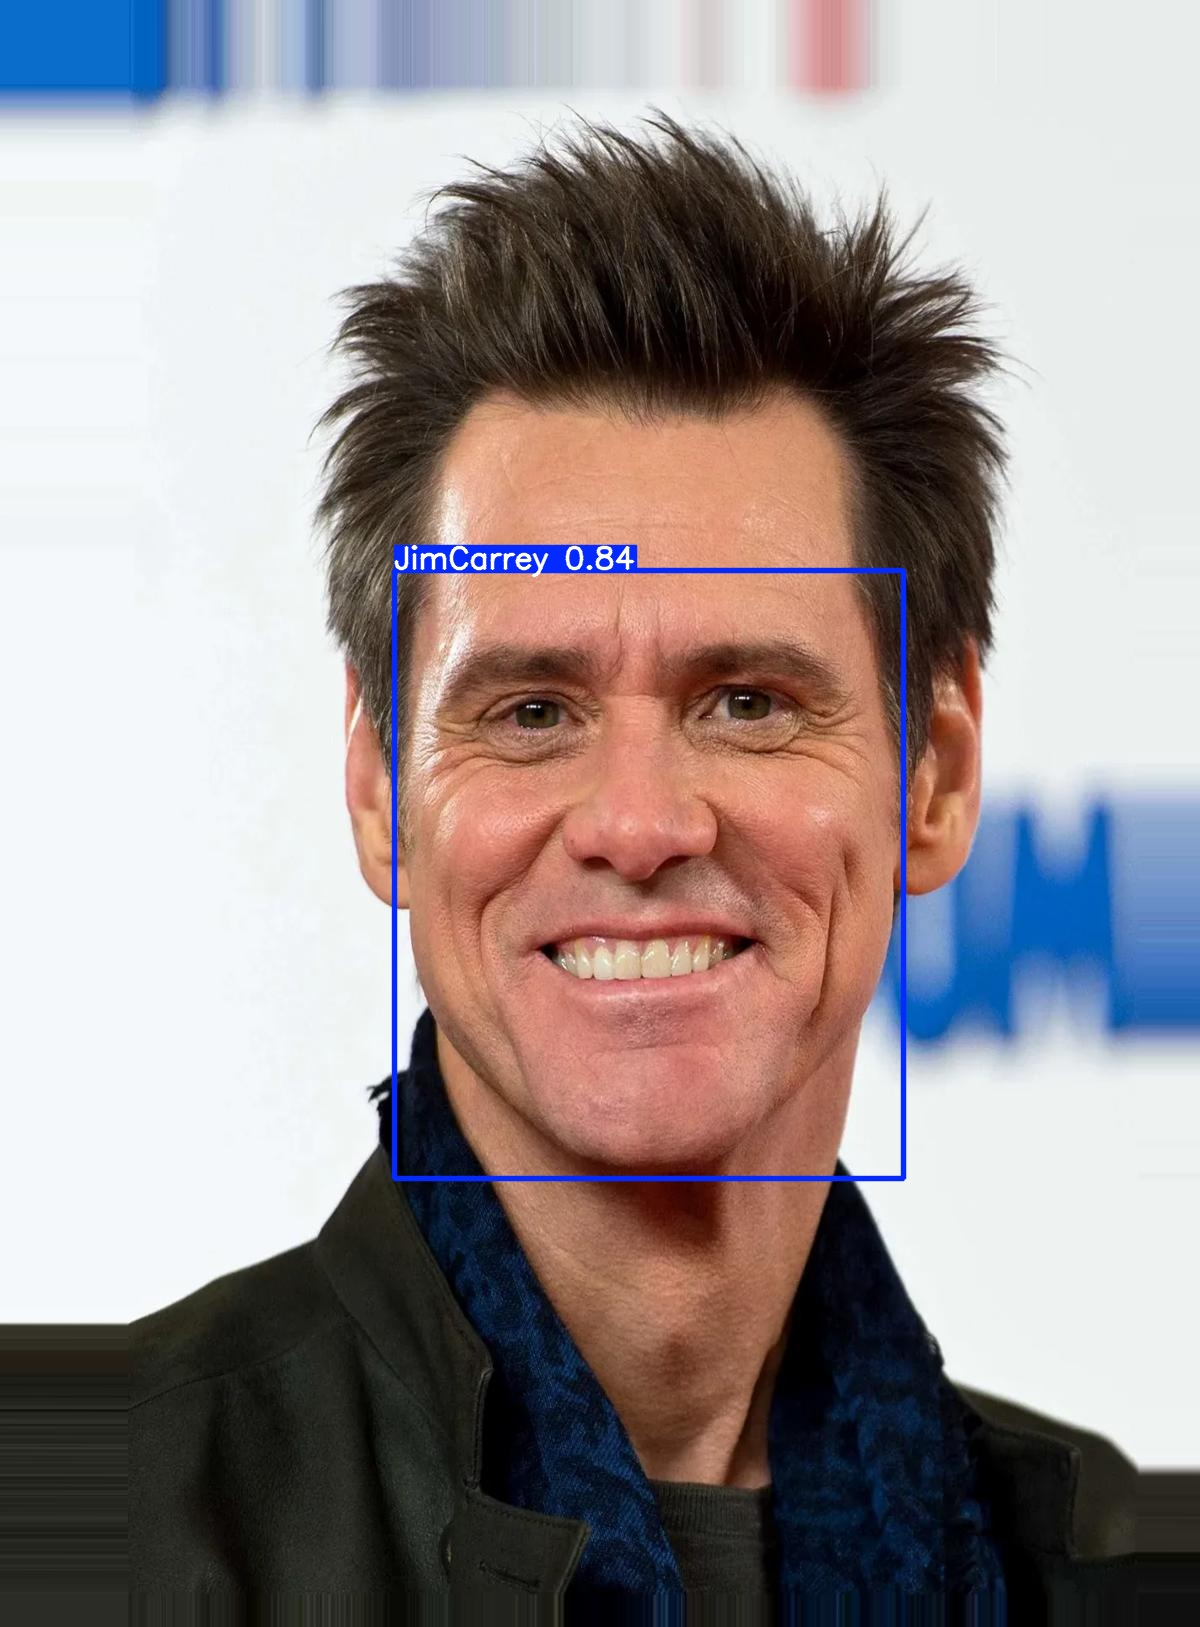

In [ ]:
!rm -rf runs/detect
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../datasets/JimCarrey/images/val/aug_0_18.jpg
display.Image(filename='runs/detect/exp/aug_0_18.jpg', width=400)